### Cross-Validation

Cross-validation can be used to select the optimal degree of a polynomial for regression, preventing overfitting. The Scikit-learn library is particularly suited for this task, as it contains functions both for generating polynomial features and for performing cross-validation.

Here's a general example of how you might approach this.

The code below loops over a range of polynomial degrees and for each degree, generates polynomial features and applies linear regression in a pipeline. It uses 5-fold cross-validation to compute a score for each model, and then selects the polynomial degree that has the highest mean cross-validation score.

This approach allows you to use cross-validation to balance model complexity (as controlled by the degree of the polynomial) with the goal of achieving the best predictive performance.

In [1]:
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np

In [4]:
def create_data_sactter_plot(X, y):
    fig, ax = plt.subplots()
    ax.scatter(X, y)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title('Data')
    return fig, ax

In [2]:
def generate_polynomial_data(coefficients, bias, xrange=[0,1], n_samples=100, noise=0.05, random_state=0):
    # Generate synthetic data based on a polynomial relationship, with some noise.
    
    # polynomial_coeffients: sorted list of coefficients of the polynomial, starting with the lowest degree, 1. 
    # for instance, if the desired polynomial is 2x^2 + 3x + 1, then the coefficients are [3, 2].
    # polynomial_bias: bias term. For instance, if the desired polynomial is 2x^2 + 3x + 1, then the bias is 1.
    # xrange: range of x values to generate data for, given in [min_x, max_x] format
    # n_samples: number of samples to generate
    # noise: standard deviation of the noise, derived from a normal distribution with mean 0
    # random_state: random seed for reproducibility
    
    # Returns: X, y (numpy arrays) of the generated data

    # generate x values
    np.random.seed(random_state)
    X = np.sort(np.random.rand(100)).reshape(-1, 1)*(max(xrange)-min(xrange)) + min(xrange)
    # generate y values based on the polynomial, and a string of the polynomial equation
    y = bias
    equation = f"y = {bias}"
    for ind, coeff in enumerate(coefficients):
        degree = ind + 1
        y += coeff * X**degree
        equation += f" + {coeff}x^{degree}"
    y = y + np.random.randn(n_samples).reshape(-1, 1)*noise  # add some noise
    # print stats about the generated data
    print(f"Generated {n_samples} data points, with x between {min(xrange)} and {max(xrange)} and y drawn from the polynomial equation:")
    print(equation)
    print(f"with some noise around it (drawn from a normal distribution with mean 0 and standard deviation of {noise})")
    print('***')
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    print('First 5 rows of X:')
    print(X[:5])
    print('First 5 rows of y:')
    print(y[:5])
    return X, y

In [3]:
X, y = generate_polynomial_data(coefficients=[3, 2], bias=1, xrange=[-10,10], n_samples=100, noise=0.05, random_state=0)

Generated 100 data points, with x between -10 and 10 and y drawn from the polynomial equation:
y = 1 + 3x^1 + 2x^2
with some noise around it (drawn from a normal distribution with mean 0 and standard deviation of 0.05)
***
X shape: (100, 1)
y shape: (100, 1)
First 5 rows of X:
[[-9.90609048]
 [-9.62420399]
 [-9.59784908]
 [-9.59563205]
 [-9.21624415]]
First 5 rows of y:
[[167.48472812]
 [157.42303428]
 [156.46714967]
 [156.28860059]
 [143.30399279]]


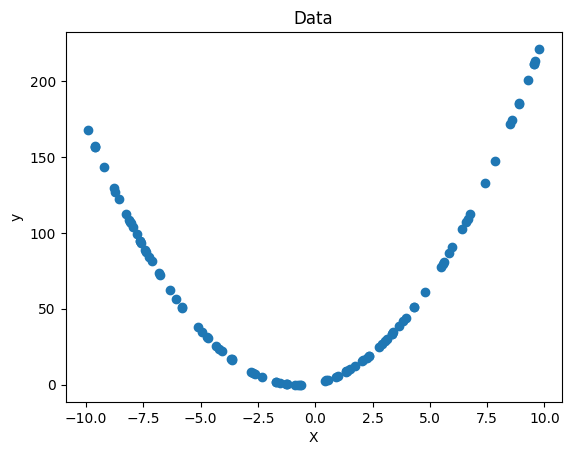

In [7]:
fig, ax = create_data_sactter_plot(X, y)

In [ ]:
# Loop over degrees to test
degrees = np.arange(1, 10)
for degree in degrees:
    # Create a pipeline that creates polynomial features, then applies linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [3]:
cross_val_scores = []

for degree in degrees:
    # Create a pipeline that creates polynomial features, then applies linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Use cross-validation to compute the mean score across multiple splits of the data
    score = cross_val_score(model, xdata, ydata, cv=5).mean()
    cross_val_scores.append(score)

# Choose the degree with the highest cross-validation score
best_degree = degrees[np.argmax(cross_val_scores)]
print(f"The best degree is {best_degree}")


The best degree is 3


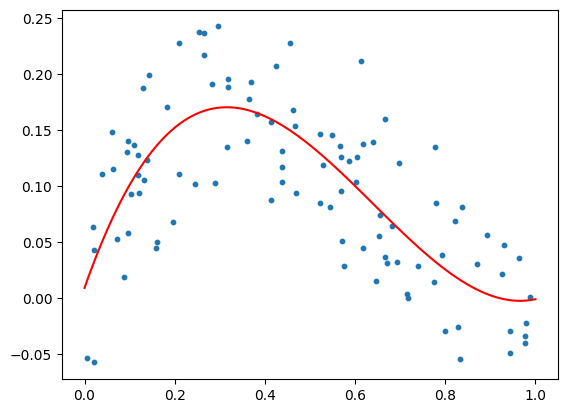

In [4]:
from matplotlib import pyplot as plt
# plot the data and the best fit curve
plt.scatter(xdata, ydata, s=10)
x = np.linspace(0, 1, 100).reshape(-1, 1)
y = make_pipeline(PolynomialFeatures(best_degree), LinearRegression()).fit(xdata, ydata).predict(x)
plt.plot(x, y, color='r')
plt.show()


The cross_val_score function in scikit-learn uses a scoring metric that depends on the estimator used. For regression estimators like LinearRegression(), it uses the R-squared metric by default.

If you want to specify a different scoring metric, you can pass it as a string to the scoring parameter of cross_val_score. For example, to use mean squared error, you could write:

```python
cross_val_score(model, xdata, ydata, cv=5, scoring='neg_mean_squared_error')
```

Note that the neg_mean_squared_error scoring function actually returns the negative of the mean squared error, since cross_val_score is designed so that higher scores are better. Thus, if you use this scoring metric, you should keep in mind that a score of 0 is the best possible score, and values less than 0 indicate errors.

## `sklearn` cross validation metrics
`sklearn` offers several cross validation metrics (see [User Guide](https://scikit-learn.org/stable/modules/cross_validation.html)). 
* [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate)  - is the most flexible function. It returns a dictionary of scores and other metrics for each fold of cross-validation. In addition to the score, it can also return other metrics such as the fit time, score time, and estimator object for each fold. This function is useful when you need to compute multiple metrics for each fold, or when you need access to the estimator object for each fold.
* [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) - is a function that returns a single score for each fold of cross-validation. It takes as input an estimator (e.g., a classifier or regressor), a dataset, and a cross-validation strategy, and returns an array of scores, one for each fold of the cross-validation. This function is useful when you only need to compute a single score for each fold, such as the accuracy of a classifier. 
* [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) is a function that performs cross-validation and returns the predicted values for each data point. It takes as input an estimator (e.g., a classifier or regressor), a dataset, and a cross-validation strategy, and returns an array of predicted values, one for each data point in the dataset. The prediction is done on the test set for each fold, and is presented for all folds, thus covering the whole dataset.

The main difference between `cross_val_predict` and `cross_val_score` is that `cross_val_predict` returns the predicted values for each data point, while `cross_val_score` returns a single score for each fold of cross-validation.